In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

In [4]:
#Establishing Path
path = r'/Users/sharonthapa/Oct 2024 Instacart Basket Analysis'

In [6]:
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_departmentsmerged.pkl'))

In [8]:
# Import departments dataframe
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [14]:
# prepare department data for merge
dept.rename(columns = {'Unnamed: 0' :  'department_id'}, inplace= True)

In [18]:
# merge department data into instacart
df_final_merged = instacart.merge(dept, on='department_id', indicator='created')

In [20]:
# Exporting new dataframe with department merged 
df_final_merged.to_pickle(os.path.join(path,'02 Data','Prepared Data','order_products_customers_departmentsmerged4.10.pkl'))

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

#### Usage frequency vs Expenditure

In [23]:
# show all the columns
instacart.columns

Index(['order_id', 'User ID', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'average_spend', 'spender_flag',
       'customer_frequency', 'frequency_flag', 'First Name', 'Surnam',
       'Gender', 'State', 'Age', 'Date Joined', 'No. of Dependants',
       'Marital Status', 'Income', 'region', 'activity_flag', 'age_group',
       'income_group', 'dependants_flag'],
      dtype='object')

In [42]:
# Create an aggregated subset with the sum of each order
cus_profile = instacart.groupby(['User ID','order_number','price_range_loc','loyalty_flag','spender_flag','activity_flag','frequency_flag','region','Gender','age_group','income_group','Marital Status','dependants_flag','days_since_prior_order'],as_index=False)['prices'].sum(numeric_only=True)
cus_profile

User ID  order_number    price_range_loc      loyalty_flag  \
0             1             1  Low-range product      New customer   
1             1             1  Mid-range product      New customer   
2             1             2  Low-range product      New customer   
3             1             2  Mid-range product      New customer   
4             1             3  Low-range product      New customer   
...         ...           ...                ...               ...   
5627587   99999            32  Mid-range product  Regular customer   
5627588   99999            33  Low-range product  Regular customer   
5627589   99999            33  Mid-range product  Regular customer   
5627590   99999            34  Low-range product  Regular customer   
5627591   99999            34  Mid-range product  Regular customer   

        spender_flag           activity_flag     frequency_flag     region  \
0        Low_spender  high-activity customer   Regular customer      South   
1        Low_spender  high-activity customer   Regular customer      South   
2        Low_spender  high-activity customer   Regular customer      South   
3        Low_spender  high-activity customer   Regular customer      South   
4        Low_spender  high-activity customer   Regular customer      South   
...              ...                     ...                ...        ...   
5627587  Low_spender  high-activity customer  Frequent customer  Northeast   
5627588  Low_spender  high-activity customer  Frequent customer  Northeast   
5627589  Low_spender  high-activity customer  Frequent customer  Northeast   
5627590  Low_spender  high-activity customer  Frequent customer  Northeast   
5627591  Low_spender  high-activity customer  Frequent customer  Northeast   

         Gender age_group   income_group Marital Status dependants_flag  \
0        Female    Adults     Low Income        married  Yes Dependants   
1        Female    Adults     Low Income        married  Yes Dependants   
2        Female    Adults     Low Income        married  Yes Dependants   
3        Female    Adults     Low Income        married  Yes Dependants   
4        Female    Adults     Low Income        married  Yes Dependants   
...         ...       ...            ...            ...             ...   
5627587    Male    Adults  Medium Income        married  Yes Dependants   
5627588    Male    Adults  Medium Income        married  Yes Dependants   
5627589    Male    Adults  Medium Income        married  Yes Dependants   
5627590    Male    Adults  Medium Income        married  Yes Dependants   
5627591    Male    Adults  Medium Income        married  Yes Dependants   

         days_since_prior_order  prices  
0                           7.0    10.1  
1                           7.0    21.5  
2                          15.0    16.1  
3                          15.0    19.3  
4                          21.0    10.6  
...                         ...     ...  
5627587                     5.0    44.4  
5627588                     6.0     4.0  
5627589                     6.0    37.2  
5627590                     6.0    12.4  
5627591                     6.0    68.2  

[5627592 rows x 15 columns]

In [44]:
cus_profile.groupby('age_group').agg({'days_since_prior_order': ['min', 'max','mean'] , 'prices': ['min','max','mean']})

days_since_prior_order                  prices            \
                                min   max       mean    min       max   
age_group                                                               
Adults                          0.0  30.0  10.113193    1.0  100082.9   
Middle-Aged                     0.0  30.0  10.094928    1.0  100066.4   
Seniors                         0.0  30.0  10.082484    1.0  100062.5   
Young Adults                    0.0  30.0  10.090942    1.0  100038.5   

                         
                   mean  
age_group                
Adults        60.318596  
Middle-Aged   62.636586  
Seniors       60.318777  
Young Adults  63.324214

###### Adults have the highest mean showing that the window between orders are longer than other age groups.

###### Young adults places orders more frequently.

###### Adults have the highest mean of the total order price.

##### Usage frequency vs expenditure by income group

In [52]:
cus_profile.groupby('income_group').agg({'days_since_prior_order': ['min' , 'max' , 'mean'] , 'prices': ['min', 'max', 'mean']})

days_since_prior_order                  prices            \
                                 min   max       mean    min       max   
income_group                                                             
High Income                      0.0  30.0   9.917146    1.0  100082.9   
Low Income                       0.0  30.0  10.546354    1.0     728.3   
Medium Income                    0.0  30.0  10.020881    1.0  100066.4   

                           
                     mean  
income_group               
High Income    172.894186  
Low Income      30.363070  
Medium Income   49.515471

##### Low income seems to order more frequently but spend less. 

#### Usage frequency vs expenditure by dependants status

In [61]:
cus_profile.groupby('dependants_flag').agg({'days_since_prior_order': ['min' , 'max' , 'mean'] , 'prices': ['min', 'max', 'mean']})

days_since_prior_order                  prices            \
                                   min   max       mean    min       max   
dependants_flag                                                            
No Dependants                      0.0  30.0  10.084845    1.0  100038.0   
Yes Dependants                     0.0  30.0  10.100430    1.0  100082.9   

                            
                      mean  
dependants_flag             
No Dependants    62.937417  
Yes Dependants   60.912305

##### Customers with dependants seem to order more but customers without dependants seem to purchase more. This may need to be looked into further as one would expect more dependants mean more spending. 

#### Usage frequency vs expenditure by loyalty status

In [68]:
cus_profile.groupby('loyalty_flag').agg({'days_since_prior_order': ['min' , 'max' , 'mean'] , 'prices': ['min', 'max', 'mean']})

days_since_prior_order                  prices            \
                                    min   max       mean    min       max   
loyalty_flag                                                                
Loyal customer                      0.0  30.0   5.619995    1.0  100056.5   
New customer                        0.0  30.0  15.842198    1.0  100041.0   
Regular customer                    0.0  30.0  11.554482    1.0  100082.9   

                             
                       mean  
loyalty_flag                 
Loyal customer    53.346237  
New customer      66.457902  
Regular customer  65.427434

##### Loyal customer seem to order more frequently compared to new customers

##### Average payment is higher in new customers

#### Usage frequency vs expenditure by spender type

In [75]:
cus_profile.groupby('spender_flag').agg({'days_since_prior_order': ['min' , 'max' , 'mean'] , 'prices': ['min', 'max', 'mean']})

days_since_prior_order                  prices            \
                                min   max       mean    min       max   
spender_flag                                                            
High_spender                    0.0  30.0   9.897288    1.0  100082.9   
Low_spender                     0.0  30.0  10.100877    1.0     907.2   

                           
                     mean  
spender_flag               
High_spender  1035.173060  
Low_spender     40.168468

##### As expected, High spenders have smaller gaps between orders and spend more compared to low spenders. 

#### Usage frequency vs expenditure by region

In [81]:
cus_profile.groupby('region').agg({'days_since_prior_order': ['min' , 'max' , 'mean'] , 'prices': ['min', 'max', 'mean']})

days_since_prior_order                  prices                     
                             min   max       mean    min       max       mean
region                                                                       
Midwest                      0.0  30.0  10.168357    1.0  100039.2  65.160412
Northeast                    0.0  30.0  10.052105    1.0  100061.0  60.479644
South                        0.0  30.0  10.100685    1.0  100082.9  62.364593
West                         0.0  30.0  10.049138    1.0  100062.5  57.263194

##### Not much of a difference in the way each region order but the west seem to spend less. 

##### West seems to order less as well as spend the least. 

#### Usage frequency vs expenditure by marital status

In [90]:
cus_profile.groupby('Marital Status').agg({'days_since_prior_order': ['min' , 'max' , 'mean'] , 'prices': ['min', 'max', 'mean']})

days_since_prior_order                   \
                                                    min   max       mean   
Marital Status                                                             
divorced/widowed                                    0.0  30.0  10.060382   
living with parents and siblings                    0.0  30.0  10.038029   
married                                             0.0  30.0  10.104664   
single                                              0.0  30.0  10.097498   

                                 prices                       
                                    min       max       mean  
Marital Status                                                
divorced/widowed                    1.0  100023.3  60.542435  
living with parents and siblings    1.0  100038.5  55.627702  
married                             1.0  100082.9  61.270932  
single                              1.0  100038.0  64.176178

##### People living with parents/siblings seem to order more frequently as expected but spend less. 

##### Single people on average seem to spend more. 

### 8. Comparing customer profile with regions and departments

In [100]:
# import final merge data
df_final = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'order_products_customers_departmentsmerged4.10.pkl'))

In [163]:
# crosstab age group vs department
region_dept_cross = pd.crosstab(df_final_merged['region'], df_final_merged['department'], dropna = False)
region_dept_cross

department  alcohol  babies  bakery  beverages  breakfast   bulk  \
region                                                             
Midwest       34043   95741  261753     598979     156155   7929   
Northeast     20120   56872  155882     364615      92420   4471   
South         48813  139511  371620     859419     223172  11180   
West          36754  102428  288155     650574     173619   8743   
NaN            4897   15840   43418      98314      25484   1128   

department  canned goods  dairy eggs    deli  dry goods pasta  ...  household  \
region                                                         ...              
Midwest           237459     1212490  234464           193463  ...     166992   
Northeast         137738      711976  139808           111939  ...      96810   
South             337458     1723016  333620           272813  ...     230061   
West              260221     1327060  257352           212043  ...     178200   
NaN                39198      202640   38590            31878  ...      27794   

department  international  meat seafood  missing  other  pantry  \
region                                                            
Midwest             60666        158260    15563   7983  420334   
Northeast           35265         91595     8970   4926  244582   
South               84649        224120    21787  11579  591754   
West                65998        173830    15906   8581  457886   
NaN                  9413         26976     2542   1342   68149   

department  personal care   pets  produce  snacks  
region                                             
Midwest            100398  21358  2134115  645143  
Northeast           58664  13150  1239418  384202  
South              142496  29909  3027476  916780  
West               106647  24059  2324678  711329  
NaN                 16101   4584   353586  108952  

[5 rows x 21 columns]

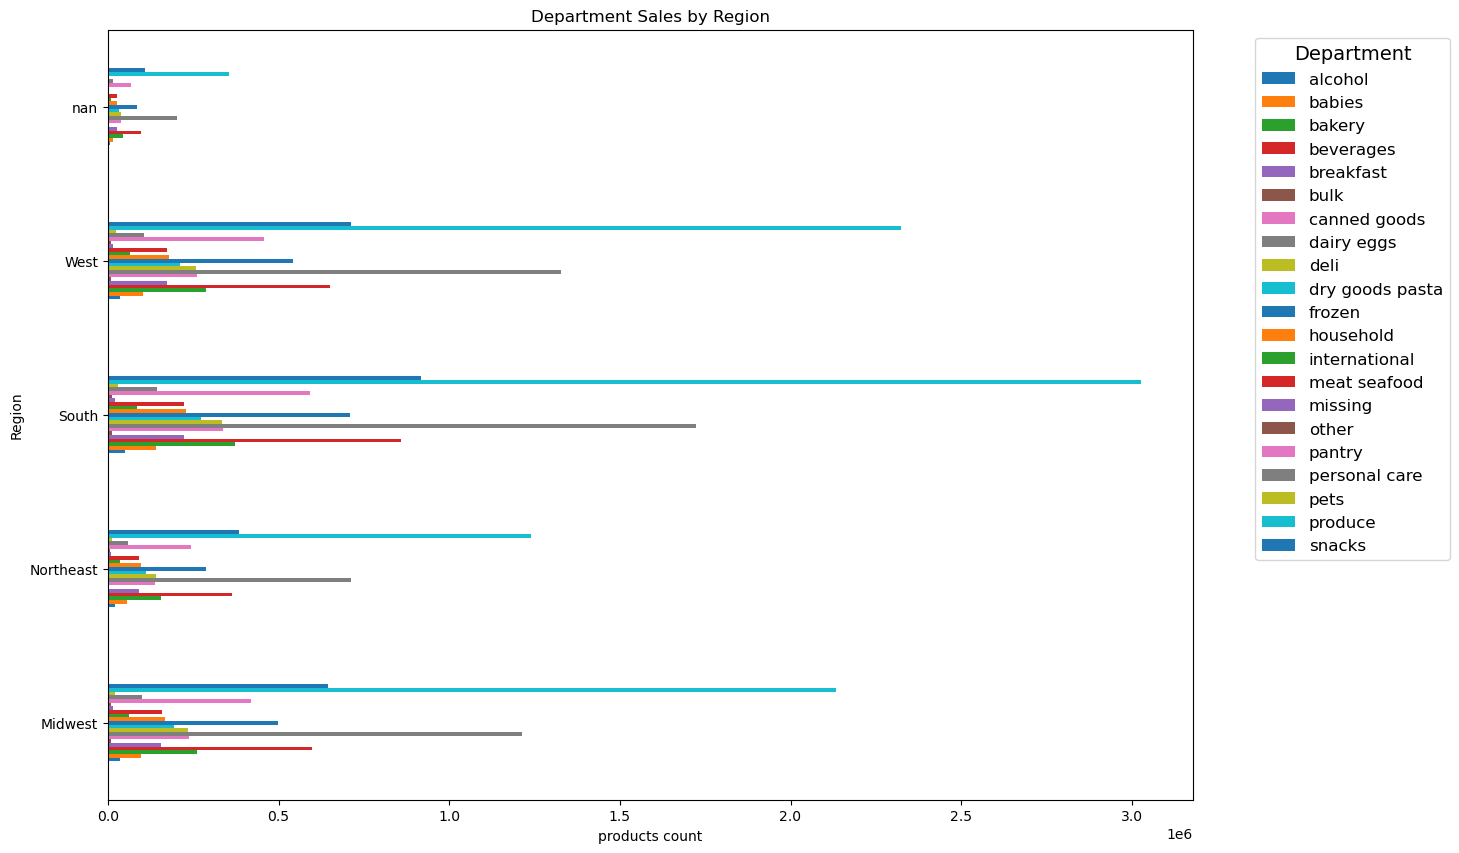

In [165]:
# bar chart
region_dept_bar = region_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Region')
plt.xlabel('Product count')
plt.ylabel('Region')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [167]:
# Export bar chart
region_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_depts_bar.png'))

Text(0.5, 0, '')

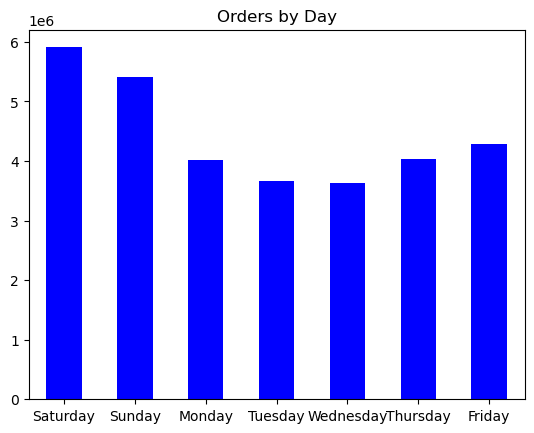

In [171]:
# bar chart orders by day of week
orders_dow_bar = df_final['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 'blue')
orders_dow_bar.set_title('Orders by Day')
orders_dow_bar.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)
orders_dow_bar.set_xlabel("")

In [173]:
# Export bar chart
orders_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_dow_bar.png'))

Text(0.5, 0, 'Hour of Day (24 hr clock)')

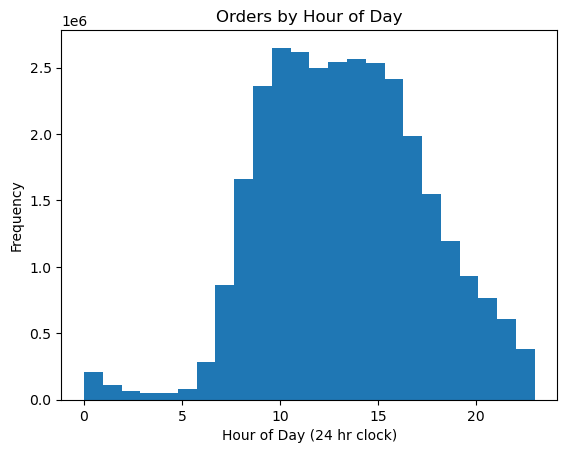

In [177]:
# histogram of hours of the day
hod_hist=df_final['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day (24 hr clock)')

In [179]:
# Export histogram
hod_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hod_hist.png'))

In [183]:
# Crosstab loyalty with age group
loyalty_income_cross = pd.crosstab(df_final['loyalty_flag'], df_final['income_group'], dropna = False)
loyalty_income_cross

income_group      High Income  Low Income  Medium Income
loyalty_flag                                            
Loyal customer        1310941     1381467        7591685
New customer           575272      798804        3429619
Regular customer      2008321     2272117       11596338

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

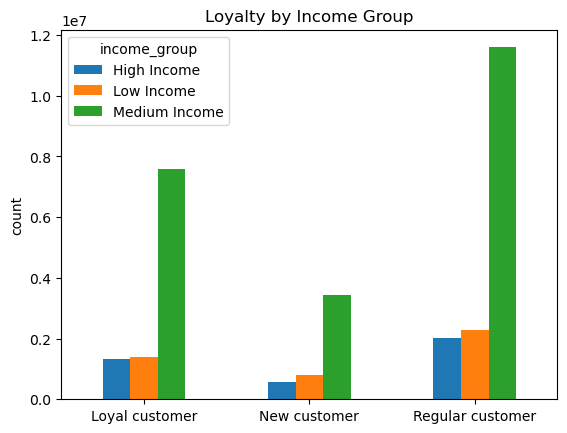

In [185]:
# bar chart
loyalty_income_bar = loyalty_income_cross.plot.bar()
plt.title('Loyalty by Income Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [187]:
# Export the chart
loyalty_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_vs_income_group_bar.png'))

In [189]:
# Crosstab loyalty with spending
loyalty_spender_cross = pd.crosstab(df_final['loyalty_flag'], df_final['spender_flag'], dropna = False)
loyalty_spender_cross

spender_flag      High_spender  Low_spender
loyalty_flag                               
Loyal customer          216600     10067493
New customer             84011      4719684
Regular customer        302814     15573962

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

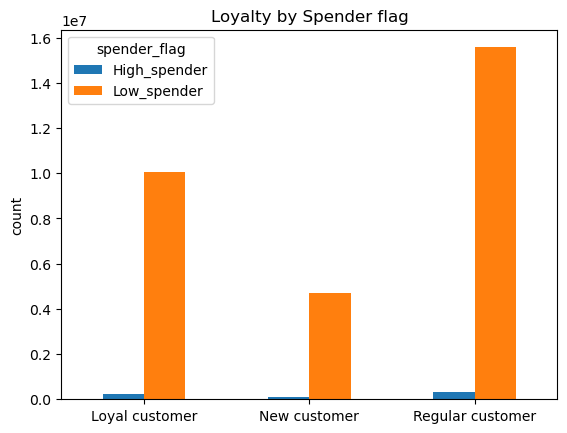

In [191]:
# bar chart
loyalty_spender_bar = loyalty_spender_cross.plot.bar()
plt.title('Loyalty by Spender flag')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [193]:
# Export the chart
loyalty_spender_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spender_bar.png'))

In [197]:
# Crosstab loyalty vs family status
loyalty_fam_cross = pd.crosstab(df_final['loyalty_flag'], df_final['Marital Status'], dropna = False)
loyalty_fam_cross

Marital Status    divorced/widowed  living with parents and siblings  \
loyalty_flag                                                           
Loyal customer              882722                            492749   
New customer                403781                            221779   
Regular customer           1358768                            766644   

Marital Status     married   single  
loyalty_flag                         
Loyal customer     7202500  1706122  
New customer       3380651   797484  
Regular customer  11160560  2590804

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

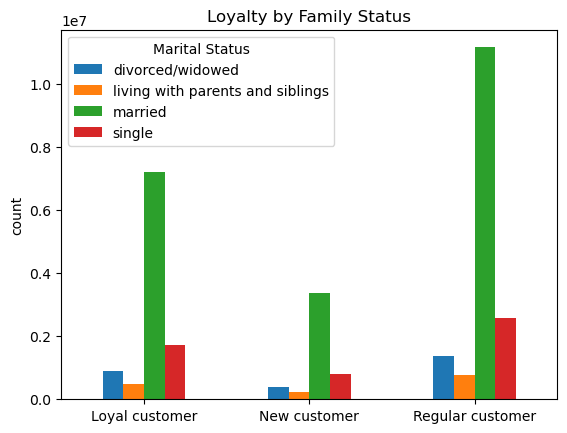

In [199]:
# bar chart
loyalty_fam_bar = loyalty_fam_cross.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [201]:
# Export the chart
loyalty_fam_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_maritalstatus_bar.png'))

In [203]:
# Crosstab loyalty vs dependants
loyalty_depend_cross = pd.crosstab(df_final['loyalty_flag'], df_final['dependants_flag'], dropna = False)
loyalty_depend_cross

dependants_flag   No Dependants  Yes Dependants
loyalty_flag                                   
Loyal customer          2588844         7695249
New customer            1201265         3602430
Regular customer        3949572        11927204

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

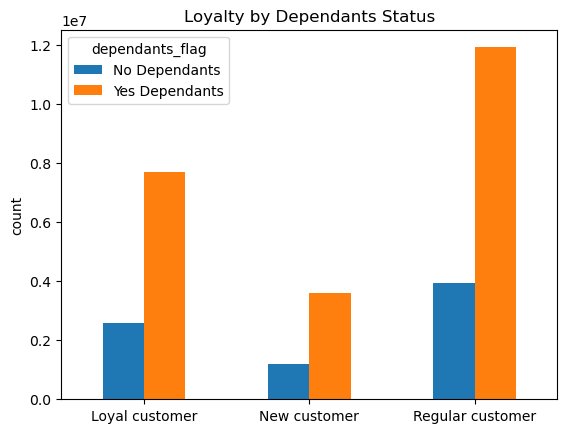

In [205]:
# bar chart
loyalty_depend_bar = loyalty_depend_cross.plot.bar()
plt.title('Loyalty by Dependants Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [211]:
# Check value counts
fam_status = df_final['Marital Status'].value_counts(dropna = False)
fam_status

Marital Status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

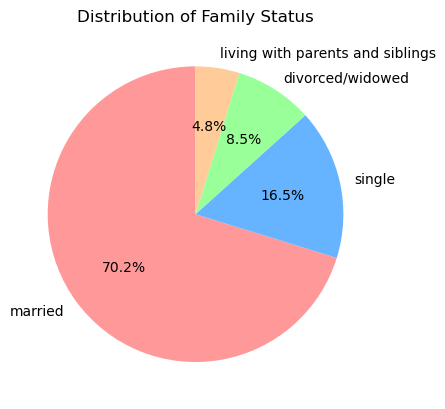

In [213]:
# Pie chart showing the distribution of family status
fam_status_distribution_pie = fam_status.plot.pie(autopct='%1.1f%%', labels= ['married', 'single', 'divorced/widowed', 'living with parents and siblings'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Family Status')
plt.show()

In [215]:
# Export the chart
fam_status_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_status_bar.png'))